### DSCI 100 – Project Planning Stage (Individual)
Name: Danial Zahid (62865654)

Date: November 11, 2025

## 1. Introduction

This project explores whether both **player age** and **time spent playing** can be used to predict if a player will subscribe to the game newsletter. By analyzing this relationship, we can identify which age groups are most engaged with the game and could be the most responsive to future newsletter campaigns.

The data was collected from a Minecraft research server managed by the UBC PLAI group (https://plaicraft.ai), which collects information about players' demographics and statistics. This analysis will focus on the **players.csv dataset**, which contains each player's age, subscription status, and the amount of time played.

## 2. Data Description

In [19]:
# Load the libraries
library(tidyverse)
library(ggplot2)
library(repr)
library(scales)

In [20]:
# Load the dataset
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [21]:
# Inspect the dataset
glimpse(players)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


In [22]:
# Find the number of rows and columns
cat("Number of observations:", nrow(players), "\n")
cat("Number of variables:", ncol(players), "\n")

Number of observations: 196 
Number of variables: 7 


In [23]:
# Show the variable names of the dataset
colnames(players)

[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"

### Variable Summary Table:

| Variable Name | Type | Description | Example | Issues |
|---------------|------|-------------|----------|-------|
| experience | character | Self-reported experience with game | "Pro" | Possible bias |
| subscribe | logical | Whether player subscribed to newsletter | TRUE/FALSE | Imbalanced |
| hashedEmail | character | Unique ID for each player | "abc123" | none |
| played_hours | numeric | Amount of time played | 3.0 | Possible bias |
| name | character | Name for each player | "Luna" | none |
| gender | character | Gender for each player | "Female" | none |
| Age | numeric | Age for each player | 21 | Some missing values (N/A) |

### Summary:
- This dataset contains 196 players and 7 variables
- There are some missing data for the 'Age' and 'played_hours' variables
- Variables of focus: 'subscribe', 'Age', and 'played_hours'

## 3. Questions

**Broad Question:**
What player characteristics and behaviours are most predictive of subscribing to a newsletter, and how do these features differ between various player types?

**Specific Question:**
Is there a relationship between the age of newsletter subscribers and the time they spend playing that could inform which group of players to target for newsletter subscription campaigns?

**Response Variable:**
'subscribe'

**Explanatory Variable:**
`Age`, `played_hours`

## 4. Exploratory Data Analysis

In [24]:
# Compute the mean value for each quantitative variable
players_mean <- players |>
    select(played_hours, Age) |>
    map_dbl(mean, na.rm = TRUE)
players_mean

played_hours          Age 
    5.845918    21.139175

| Variable Name | Mean |
|---------------|------|
| experience | 5.85 |
| Age | 21.14 |

In [25]:
# Filter subscribers only
subscribers_filter <- players |>
    filter(subscribe == TRUE, !is.na(Age), !is.na(played_hours))
subscribers_filter

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47
Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23


Warning message in geom_histogram(bindwidth = 1, fill = "blue", color = "black"):
“Ignoring unknown parameters: `bindwidth`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


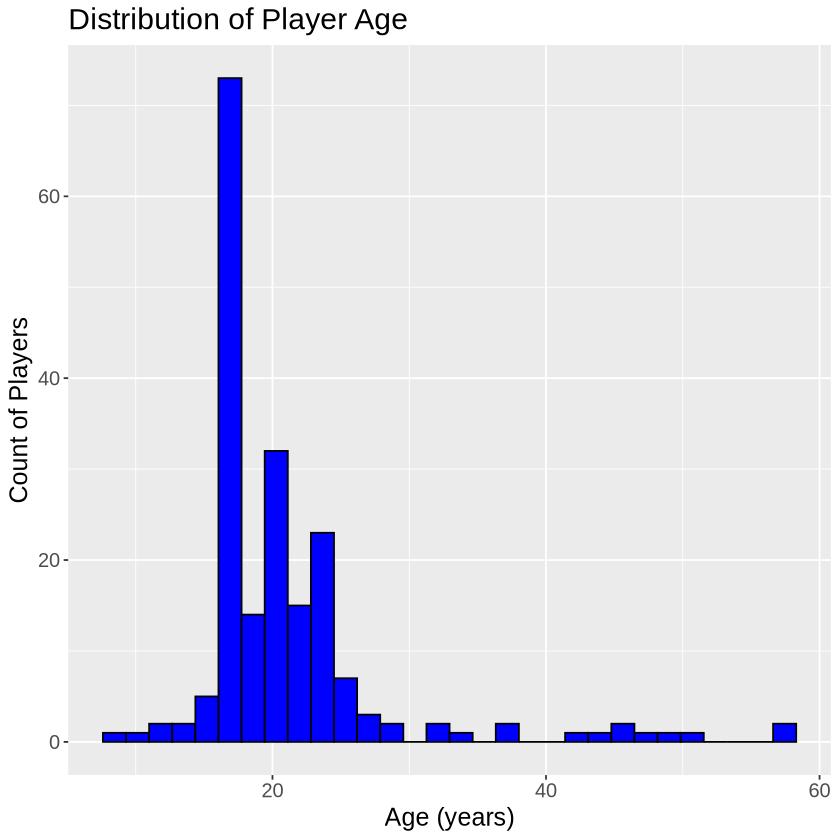

In [35]:
# Visualization 1: Distribution of Player Age
plot1 <- ggplot(players, aes(x = Age)) +
    geom_histogram(bindwidth = 1, fill = "blue", color = "black") +
    labs(title = "Distribution of Player Age", x = "Age (years)", y = "Count of Players") +
    theme(text = element_text(size = 15))
plot1

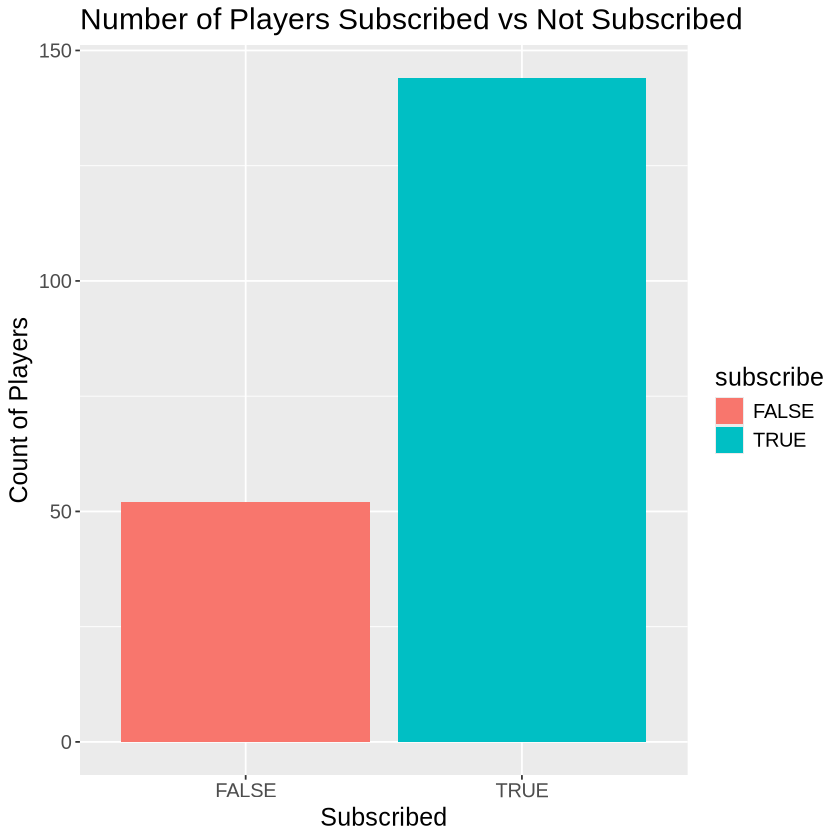

In [34]:
# Visualization 2: Newspaper Subscription Count
plot2 <- ggplot(players, aes(x = subscribe, fill = subscribe)) +
    geom_bar() +
    labs(title = "Number of Players Subscribed vs Not Subscribed", x = "Subscribed", y = "Count of Players") +
    theme(text = element_text(size = 15))
plot2

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 15
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


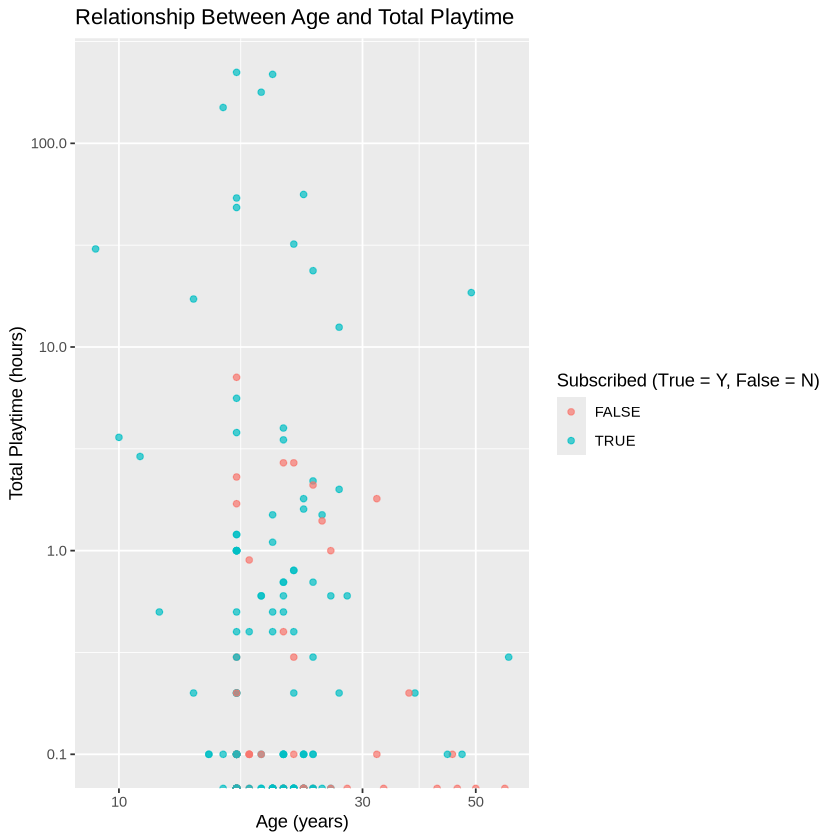

In [33]:
# Visualization 3: Age vs. Time Played
plot3 <- ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.7) +
    scale_x_log10() +
    scale_y_log10() +
    labs(title = "Relationship Between Age and Total Playtime", x = "Age (years)", y = "Total Playtime (hours)", color = "Subscribed (True = Y, False = N)")
    theme(text = element_text(size = 15))
plot3

### Insights from visualizations
- The histogram shows that the largest majority of players who have subscribed to a game newsletter are between 10 and 30 years old, with a high concentration of players who are teenagers or in their early twenties. This indicates that most current subscriptions are younger players, and shows that they are likely the most appropriate group for newsletter targeting campaigns. Furthermore, the number of players who have subscribed to the newsletter is more than double of the number who have not subscribed.
- The scatterplot shows that most players have relatively low playtime hours, but there are a few players who have higher hours, with outliers spending 150 or more hours. The trend shows a weak or slightly negative linear relationship, meaning that as 'Age' increases,  the 'played_hours' tends to decrease. This suggests that younger players are more active in the game compared to older players.

## 5. Methods and Plan

**Why is this method appropriate?**

For my question of interest, I will answer using linear regression and correlation analysis to examine the relationship between age and total playtime among newsletter subscribers. This approach is the most appropriate because both 'Age' and 'played_hours' variables are numeric. This allows us to use linear regression to estimate the strength and direction of their relationship. Correlation analysis will help determine how close the two variables move together.

**Which assumptions are required, if any, to apply the method selected?**

The relationship between 'Age' and 'played_hours' is linear, and the data is scaled to avoid any outliers.

**What are the potential limitations or weaknesses of the method selected?**

A limitation of this method is that 'Age' values may be missing for some players. In addition, a few players have higher playtime hours than others, which can distort the linear trend and reduce the accuracy of the relationship.

**How are you going to compare and select the model?**

I will compare the models to determine which is best by using the Root Mean Squared Error (RMSE) and linear regression lines to evaluate how well they explain the relationship between 'Age' and 'played_hours'. If I experience multiple models being used for testing, then I will further use cross-validation on the training dataset. The best model will be the one that presents the best results in terms of accuracy, interpretability, and data efficiency.

**How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross-validation?**

I will first begin by cleaning the data to remove any outliers and missing data values in 'Age' and 'played_hours' to ensure data quality. Then, I will split the data into training and testing subsets, a 75-25 percent split. The model will be trained only on the training data, while the testing data will be used for the final evaluation. In addition, I will use a 5-fold cross-validation on the training data to evaluate the performance and prevent overfitting. Cross-validation will provide an accurate estimate of model accuracy by testing the model on many folds before using it on the testing data.

## 6. GitHub Repository

**GitHub Repository Link:**
https://github.com/danial-z/dsci-100-2025w1-group-39.git